In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import python modules
import re
import string
import math

#import text cleaning libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('sms_spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)
data = data[['v1','v2']]
data.rename(columns={'v1':'labels', 'v2':'text'},inplace=True)

In [5]:
data['class'] = np.where(data['labels']=='ham',0,1)

In [6]:
data.head()

,labels,text,class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


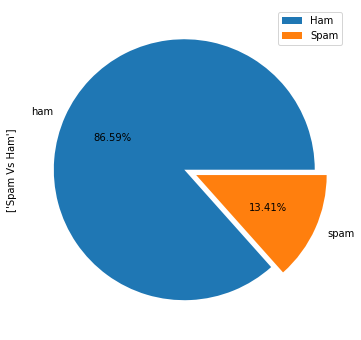

In [7]:
# amount of spam and ham data
data['labels'].value_counts().plot(kind='pie',explode=[0,0.1], autopct="%1.2f%%", figsize=(6,6))
plt.ylabel(['Spam Vs Ham'])
plt.legend(['Ham','Spam'])
plt.show()

* Here, we are having a Inbalanced dataset

In [8]:
# view sampe of data
for i in data.iterrows():
    print("class_label: {}\n SMS:\n {}\n".format(i[1][0],i[1][1]))
    if i[0] == 3:
        break

class_label: ham
 SMS:
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

class_label: ham
 SMS:
 Ok lar... Joking wif u oni...

class_label: spam
 SMS:
 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

class_label: ham
 SMS:
 U dun say so early hor... U c already then say...



In [9]:
data['length'] = data['text'].apply(len)
data.head(3)

,labels,text,class,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155


In [10]:
data['length'].max()

910

In [11]:
data[data['length']==910]['text'].iloc[0] 

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

* We are having some Romiyo over here, sending SMS to someone..

In [12]:
# string.punctuation

In [13]:
stop_words = set(stopwords.words("english"))
ss = SnowballStemmer(language="english")

In [14]:
# function to clean the Text
def cleanText(x): 
    #lower case
    x = x.lower()
    
    #email-id
    x = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailadd', x)
    
    #url
    x = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'urladd', x)
    
    #money symbols
    x = re.sub('£|\$', 'moneysymbols', x)
      
    #remove digit and words
    x = re.sub('\W*\d\w*', '', x)     #OR  re.sub('[^a-zA-Z]',' ',x)
    
    #remove punctuation
    x = re.sub('[%s]'% re.escape(string.punctuation), '', x)
    
    # Tokenization, stopwords removal and stemming
    x = " ".join([ss.stem(word) for word in word_tokenize(x) if word not in stop_words])
    
    #remove extra spaces
    x = re.sub(' +', ' ', x)   # x.split()
    
    return x
 

data['text'] = data['text'].apply(cleanText)

In [15]:
data.head(2)

,labels,text,class,length
0,ham,go jurong point crazi avail bugi n great world...,0,111
1,ham,ok lar joke wif u oni,0,29


## WordCloud for spam and Ham SMS

In [16]:
from wordcloud import WordCloud

In [17]:
ham_messages = data[data['labels']=='ham']['text']
spam_messages = data[data['labels']=='spam']['text']

In [18]:
# separate out spam and ham words
spam_words = []
ham_words = []

def extractSpamWords(SpamMessages):
    global spam_words
    words = [word for word in word_tokenize(SpamMessages)]
    spam_words = spam_words + words
    
def extractHamWords(HamMessages):
    global ham_words
    words = [word for word in word_tokenize(HamMessages)]
    ham_words = ham_words + words

# Apply the func
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

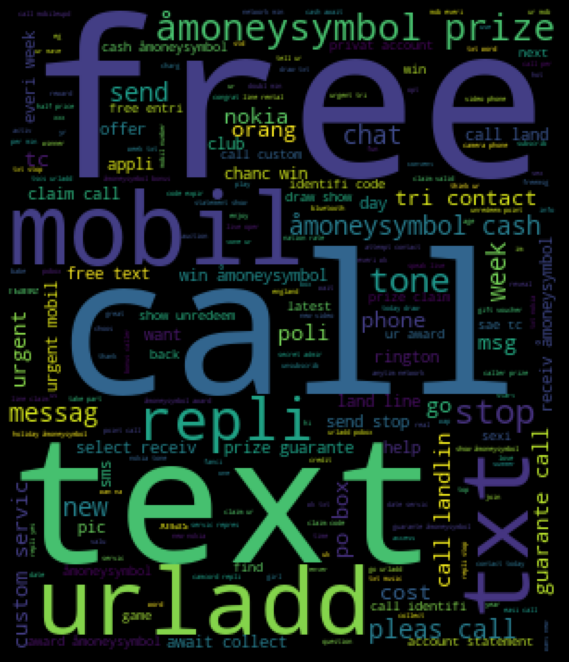

In [19]:
# spam wordcloud
spam_wordcloud = WordCloud(width=300, height=350,background_color='black').generate(" ".join(spam_words))
plt.figure(figsize=(10,9),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)  #Adjust the padding between and around subplots.
plt.show()

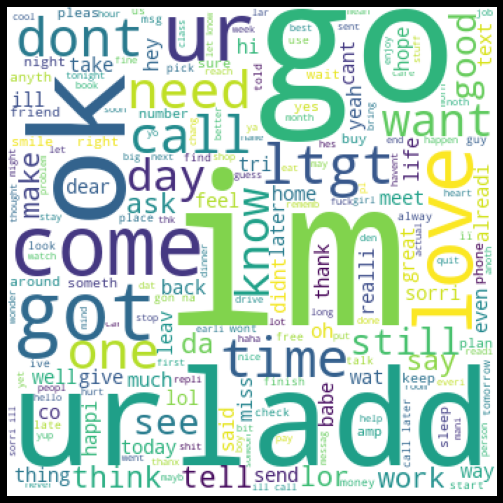

In [20]:
# ham words wordcloud
ham_wordcloud = WordCloud(width=350,height=350,background_color='white').generate(" ".join(ham_words))
plt.figure(figsize=(10,9),facecolor='k',edgecolor='red')
plt.axis('off')
plt.imshow(ham_wordcloud)
plt.show()

In [21]:
# Tokenization, stopwords removal and Stemming

#data['text'] = data['text'].apply(lambda x: " ".join([ss.stem(word) for word in word_tokenize(x) if not word in stop_words]))

In [22]:
data.head(3)

,labels,text,class,length
0,ham,go jurong point crazi avail bugi n great world...,0,111
1,ham,ok lar joke wif u oni,0,29
2,spam,free entri wkli comp win fa cup final tkts may...,1,155


In [23]:
for i in data.iterrows():
    print("label: {}\n SMS:\n {}\n\n".format(i[1][0],i[1][1]))
    if i[0] == 3:
        break

label: ham
 SMS:
 go jurong point crazi avail bugi n great world la e buffet cine got amor wat


label: ham
 SMS:
 ok lar joke wif u oni


label: spam
 SMS:
 free entri wkli comp win fa cup final tkts may text fa receiv entri questionstd txt ratetc appli


label: ham
 SMS:
 u dun say earli hor u c alreadi say




### Create a vectorizer & Transform into column features

In [24]:
# create a document term matrix.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vect = TfidfVectorizer(encoding='latin-1', strip_accents='unicode')

#fit and transform the text to num
features = vect.fit_transform(data['text'])
print(features.shape)

(5572, 6693)


In [26]:
# example of tfidf vect
#mess = data.iloc[2]['text']

#print(vect.transform([mess]))
# better view

#j = vect.transform([mess]).toarray()[0]
#print('index\tidf\ttfidf\tterm')
#for i in range(len(j)):
 #   if j[i] != 0:
  #      print(i, format(vect.idf_[i], '.4f'), format(j[i], '.4f'), vect.get_feature_names()[i],sep='\t')

In [27]:
cv = CountVectorizer()
Xv = cv.fit_transform(data['text'])
print(Xv.shape)

(5572, 6694)


In [28]:
cvect = CountVectorizer()
XX = cvect.fit(data['text']) 
#XX.vocabulary_
#XX.get_feature_names()

In [29]:
X = cv.fit_transform(data['text']).toarray()
#X

In [30]:
df = pd.DataFrame(X, columns=cv.get_feature_names())
#df

In [31]:
df.head(3)

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,ìï,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Buiding

In [32]:
y = data['class']

In [33]:
# model libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# metrics  
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.metrics import classification_report

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [35]:
# Logistic Regression
log_clf = LogisticRegression()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
nb_clf = MultinomialNB()

In [36]:
for clf in (log_clf, svc_clf, dt_clf, nb_clf):
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.9757847533632287
SVC 0.9748878923766816
DecisionTreeClassifier 0.9668161434977578
MultinomialNB 0.968609865470852


**whenever we have a imbalanced dataset we have to refer to precision, recall and f1 score**

In [37]:
#svc_clf = SVC()
#svc_clf.fit(x_train,y_train)

#mypred = svc_clf.predict(x_test)

#print("accuracy_score",accuracy_score(y_test, mypred))
#print("fbeta_score",fbeta_score(y_test, mypred, beta=0.5))

In [38]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

pred = nb.predict(x_test)

print("accuracy_score",accuracy_score(y_test, pred))
print("fbeta_score",fbeta_score(y_test, pred, beta=0.5))

accuracy_score 0.968609865470852
fbeta_score 0.8810068649885583


In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       949
           1       0.87      0.93      0.90       166

    accuracy                           0.97      1115
   macro avg       0.93      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [40]:
predictions = [["I will call you later"],["you won a huge bumper lottery. call on below whatsapp number to claim your reward."],["free courses to enroll! claim your seat fast"]]
for pred in predictions:
    test = cv.transform(pred)
    res = nb.predict(test)
    if res == 0:
        print("Ham")
    else:
        print("Spam")

Ham
Spam
Spam


## Save the Model

In [41]:
import pickle

In [42]:
# model pickle file
pickle.dump(nb, open("spam_sms.pkl","wb"))

In [43]:
# transform pickle file
pickle.dump(cv, open("smsvec.pkl","wb"))